This notebook uses code adapted from 

Fatiando 
- Uieda, L, Oliveira Jr, V C, Ferreira, A, Santos, H B; Caparica Jr, J F (2014), Fatiando a Terra: a Python package for modeling and inversion in geophysics. figshare. doi:10.6084/m9.figshare.1115194

SimPEG
- Cockett, R., S. Kang, L.J. Heagy, A. Pidlisecky, D.W. Oldenburg (2015, in review), SimPEG: An open source framework for simulation and gradient based parameter estimation in geophysical applications. Computers and Geosciences

In [631]:
# %%file importMag.py
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# import warnings
# warnings.filterwarnings('ignore') # ignore warnings: only use this once you are sure things are working

# from IPython.html.widgets import *
# from fromFatiando import *
# from fromSimPEG import *
# from scipy.constants import mu_0

from importMag import *

In [632]:
%matplotlib inline

In [633]:
def definePrism(dx, dy, dz, depth, susc = 1., x0=0.,y0=0., pinc=0., pdec=0., Einc=90., Edec=0., Bigrf=1e3, Q = 0., rinc = 0., rdec = 0.):
    """
        wrapper on fatiando prism construction
        
        Note: UTM coordinate is used (x:east, y:north, z:up)
        
        Prism geometry:
            - dx, dy, dz: width, length and height of prism
            - depth : depth to top of prism
            - susc : susceptibility of prism
            - x0, y0 : center of prism in horizontal plane
            - pinc, pdec : inclination and declination of prism. 
                When defining the inclination and declination of the prism, the normal vector is the vector along the x-axis
                of the local coordinate system of the prism, defined by the provided values of dx, dy, dz
        
        Earth's field:
            - Einc, Edec : inclination and declination of Earth's magnetic field
            - Bigrf : amplitude of earth's field in units of nT
        
        Remnance:
            - Q : Koenigsberger ratio
            - Rinc, Rdec : inclination and declination of remnance in block 
        
    """
    
    Higrf = Bigrf * 1e-9 / mu_0

    x1, x2 = -dx/2. + x0, dx/2. + x0
    y1, y2 = -dy/2. + y0, dy/2. + y0
    z1, z2 = depth, depth + dz
    Mind = susc*Higrf
    rMag = Q*Mind
    
    # This is a bit of a hack: I am putting all of the parameters we will need later in the 'property' dictionary 
    return fatiandoGridMesh.Prism(x1, x2, y1, y2, z1, z2,{'magnetization': fatiandoUtils.ang2vec(rMag, rinc-pinc, rdec-pdec),'pinc':pinc,'pdec':pdec,'rinc':rinc,'rdec':rdec,'depth':depth,'Einc':Einc,'Edec':Edec,'Mind':Mind})

In [634]:
# define the survey area
nx, ny = 50,50
surveyArea = (-20., 20., -20., 20.)
z = 0. 
shape = (nx,ny)
xp, yp, zp = fatiandoGridMesh.regular(surveyArea,shape, z=z)

In [636]:
test = fatiandoUtils.ang2vec(1., 60., 30.)

In [637]:
out = simpegCoordUtils.rotatePointsFromNormals(np.r_[1., 0., 0.].reshape([1,-1]), np.r_[1., 0., 0.], test)

In [625]:
print out
print test

[[ 0.4330127  0.25       0.8660254]]
[ 0.4330127  0.25       0.8660254]


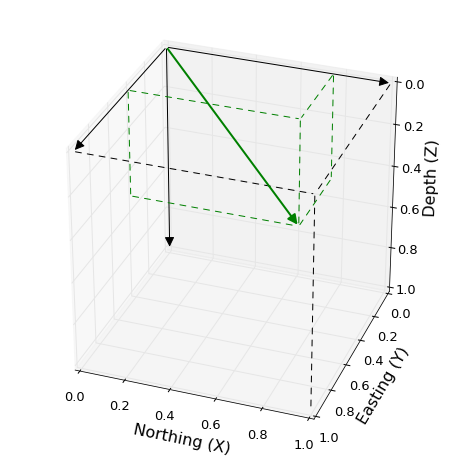

In [630]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
arrowfun = lambda b: Arrow3D([0.,b[0]],[0.,b[1]],[0.,b[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color="g")
y = Arrow3D([0,1],[0,0],[0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
x = Arrow3D([0,0],[0,1],[0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
z = Arrow3D([0,0],[0,0],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
y0 = Arrow3D([0,1],[1,1],[0,0], mutation_scale=20, lw=1, arrowstyle="-", color="k", linestyle="dashed")
x0 = Arrow3D([1,1],[0,1],[0,0], mutation_scale=20, lw=1, arrowstyle="-", color="k", linestyle="dashed")
z0 = Arrow3D([1,1],[1,1],[0,1], mutation_scale=20, lw=1, arrowstyle="-", color="k", linestyle="dashed")

test = fatiandoUtils.ang2vec(1.,30.,30.)
x0_vec0 = Arrow3D([0.,test[0]],[test[1],test[1]],[0., 0.], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
y0_vec0 = Arrow3D([test[0],test[0]],[0.,test[1]],[0., 0.], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
x0_vec = Arrow3D([0.,test[0]],[test[1],test[1]],[test[2],test[2]], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
y0_vec = Arrow3D([test[0],test[0]],[0.,test[1]],[test[2],test[2]], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
z0_vec = Arrow3D([test[0],test[0]],[test[1],test[1]],[0.,test[2]], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
z0_vec0 = Arrow3D([test[0],test[0]],[0.,0.],[0.,test[2]], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
z0_vec1 = Arrow3D([0.,0.],[test[1],test[1]],[0.,test[2]], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")

vec = arrowfun(test)

ax.add_artist(x)
ax.add_artist(y)
ax.add_artist(z)
ax.add_artist(x0)
ax.add_artist(y0)
ax.add_artist(z0)
ax.add_artist(vec)
ax.add_artist(y0_vec)
ax.add_artist(x0_vec)
ax.add_artist(y0_vec0)
ax.add_artist(x0_vec0)
ax.add_artist(z0_vec)
ax.add_artist(z0_vec0)
ax.add_artist(z0_vec1)

# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)
ax.set_xlabel("Northing (X)", color='k', fontsize = 16)
ax.set_ylabel("Easting (Y)", color='k', fontsize = 16)
ax.set_zlabel("Depth (Z)", color='k', fontsize = 16)
ax.invert_zaxis()
ax.invert_yaxis()
ax.view_init(30,-70)
# ax.view_init(-90,0)

In [628]:
def plotObj3D(p,elev,azim):
    
    depth = p.props['depth']
    x1, x2 = p.x1, p.x2
    y1, y2 = p.y1, p.y2
    z1, z2 = p.z1, p.z2
    pinc, pdec = p.props['pinc'], p.props['pdec']
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams.update({'font.size': 13})    
    ax.set_xlim3d(surveyArea[:2])
    ax.set_ylim3d(surveyArea[2:])
    ax.set_zlim3d(0., 20)

    xpatch = [x1,x1,x2,x2]
    ypatch = [y1,y2,y2,y1]
    zpatch = [z1,z1,z1,z1]
    
    dumvec = fatiandoUtils.ang2vec(1.,pinc,pdec)
    
    xyz = np.vstack([xpatch,ypatch,zpatch]).T
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))
    zpatch = [z2,z2,z2,z2]
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],dumvec,np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))
    
    xpatch = [x1,x1,x1,x1]
    ypatch = [y1,y2,y2,y1]
    zpatch = [z1,z1,z2,z2]                                  
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],dumvec,np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))    
    xpatch = [x2,x2,x2,x2]                                 
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],dumvec,np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])])) 
    
    xpatch = [x1,x2,x2,x1]
    ypatch = [y1,y1,y1,y1]
    zpatch = [z1,z1,z2,z2]                                  
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],dumvec,np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))   
    ypatch = [y2,y2,y2,y2]                                 
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],dumvec,np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])])) 
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Depth (m)')
    ax.invert_zaxis()
    ax.invert_yaxis()
    ax.view_init(elev,azim) 

# ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b')

In [560]:
def getField(p,comp='tf',irt='induced'):
    
    pinc,pdec = p.props['pinc'], p.props['pdec']
    Einc, Edec = p.props['Einc'], p.props['Edec']
    rinc,rdec = p.props['rinc'], p.props['rdec']
    Mind = p.props['Mind']
    
    x1, x2 = p.x1, p.x2
    y1, y2 = p.y1, p.y2
    z1, z2 = p.z1, p.z2
    
    XYZ = np.vstack([xp,yp,zp]).T
#     XYZ = simpegCoordUtils.rotatePointsFromNormals(XYZ, fatiandoUtils.ang2vec(1., pinc, pdec), np.r_[1.,0.,0.], np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.] )

    xp_eval, yp_eval, zp_eval = XYZ[:,0], XYZ[:,1], XYZ[:,2]

    if (irt is 'induced') or (irt is 'total'):
        if comp is 'bx': fieldi = fatiandoMagPrism.bx(xp_eval,yp_eval,zp_eval,[p],fatiandoUtils.ang2vec(Mind, Einc-pinc, Edec-pdec))
        if comp is 'by': fieldi = fatiandoMagPrism.by(xp_eval,yp_eval,zp_eval,[p],fatiandoUtils.ang2vec(Mind, Einc-pinc, Edec-pdec))
        if comp is 'bz': fieldi = fatiandoMagPrism.bz(xp_eval,yp_eval,zp_eval,[p],fatiandoUtils.ang2vec(Mind, Einc-pinc, Edec-pdec))
        if comp is 'tf': fieldi = fatiandoMagPrism.tf(xp_eval,yp_eval,zp_eval,[p],Einc-pinc,Edec-pdec,fatiandoUtils.ang2vec(Mind, Einc-pinc, Edec-pdec))
            
    if (irt is 'remnant') or (irt is 'total'):
        if comp is 'bx': fieldr = fatiandoMagPrism.bx(xp_eval,yp_eval,zp_eval,[p])
        elif comp is 'by': fieldr = fatiandoMagPrism.by(xp_eval,yp_eval,zp_eval,[p])
        elif comp is 'bz': fieldr = fatiandoMagPrism.bz(xp_eval,yp_eval,zp_eval,[p])
        elif comp is 'tf': fieldr = fatiandoMagPrism.tf(xp_eval,yp_eval,zp_eval,[p],Einc-pinc,Edec-pdec)
        
    if irt is 'induced':
        return fieldi
    elif irt is 'remnant':
        return fieldr
    elif irt is 'total':
        return fieldi + fieldr

In [606]:
p  = definePrism(5., 5., 2., 1., x0=0, y0=0, Einc=60, Edec=0.)

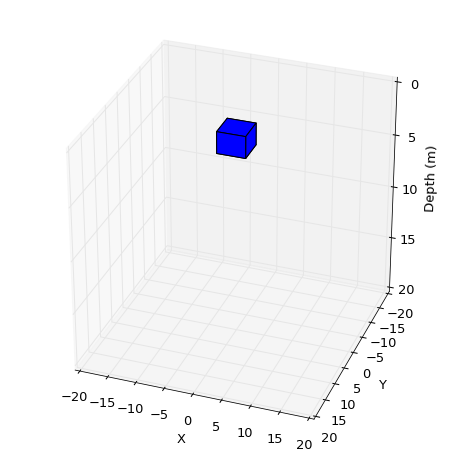

In [607]:
plotObj3D(p, 30., -70.)

In [608]:
bx = getField(p, comp='bx')
by = getField(p, comp='by')
bz = getField(p, comp='bz')

<matplotlib.colorbar.Colorbar instance at 0x11972ab90>

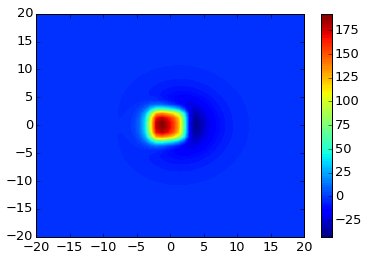

In [609]:
X = xp.reshape((nx, ny))
Y = yp.reshape((nx, ny))
Bx = bx.reshape((nx, ny))
By = by.reshape((nx, ny))
Bz = bz.reshape((nx, ny))

plt.contourf(X, Y, Bz, 100)
plt.colorbar()

<matplotlib.contour.QuadContourSet instance at 0x119796f38>

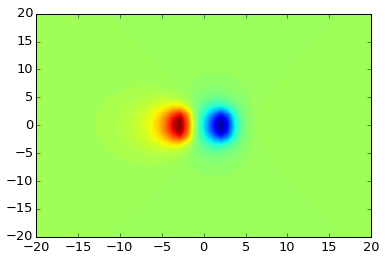

In [610]:
plt.contourf(X, Y, Bx, 100)

<matplotlib.contour.QuadContourSet instance at 0x1183caea8>

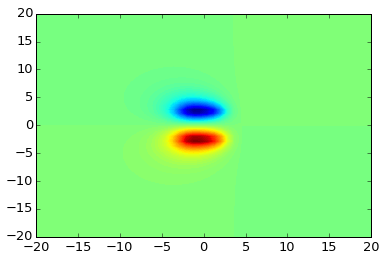

In [611]:
plt.contourf(X, Y, By, 100)

In [440]:
fatiandoUtils.ang2vec(1., 70., 50.)

array([ 0.21984631,  0.26200263,  0.93969262])

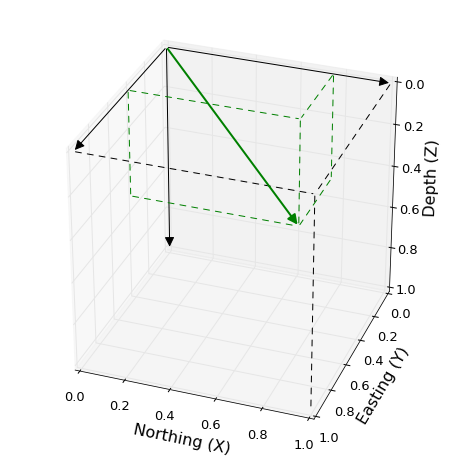

In [456]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
arrowfun = lambda b: Arrow3D([0.,b[0]],[0.,b[1]],[0.,b[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color="g")
y = Arrow3D([0,1],[0,0],[0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
x = Arrow3D([0,0],[0,1],[0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
z = Arrow3D([0,0],[0,0],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
y0 = Arrow3D([0,1],[1,1],[0,0], mutation_scale=20, lw=1, arrowstyle="-", color="k", linestyle="dashed")
x0 = Arrow3D([1,1],[0,1],[0,0], mutation_scale=20, lw=1, arrowstyle="-", color="k", linestyle="dashed")
z0 = Arrow3D([1,1],[1,1],[0,1], mutation_scale=20, lw=1, arrowstyle="-", color="k", linestyle="dashed")

test = fatiandoUtils.ang2vec(1.,30.,30.)

x0_vec0 = Arrow3D([0.,test[0]],[test[1],test[1]],[0., 0.], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
y0_vec0 = Arrow3D([test[0],test[0]],[0.,test[1]],[0., 0.], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
x0_vec = Arrow3D([0.,test[0]],[test[1],test[1]],[test[2],test[2]], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
y0_vec = Arrow3D([test[0],test[0]],[0.,test[1]],[test[2],test[2]], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
z0_vec = Arrow3D([test[0],test[0]],[test[1],test[1]],[0.,test[2]], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
z0_vec0 = Arrow3D([test[0],test[0]],[0.,0.],[0.,test[2]], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")
z0_vec1 = Arrow3D([0.,0.],[test[1],test[1]],[0.,test[2]], mutation_scale=20, lw=1, arrowstyle="-", color="g", linestyle="dashed")

vec = arrowfun(test)

ax.add_artist(x)
ax.add_artist(y)
ax.add_artist(z)
ax.add_artist(x0)
ax.add_artist(y0)
ax.add_artist(z0)
ax.add_artist(vec)
ax.add_artist(y0_vec)
ax.add_artist(x0_vec)
ax.add_artist(y0_vec0)
ax.add_artist(x0_vec0)
ax.add_artist(z0_vec)
ax.add_artist(z0_vec0)
ax.add_artist(z0_vec1)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel("Northing (X)", color='k', fontsize = 16)
ax.set_ylabel("Easting (Y)", color='k', fontsize = 16)
ax.set_zlabel("Depth (Z)", color='k', fontsize = 16)
ax.invert_zaxis()
ax.invert_yaxis()
ax.view_init(30,-70)
# ax.view_init(-90,0)

In [453]:
def RotationMatrix():
    Rx = lambda rad: np.array([[1.,0., 0.],\
               [0.,np.cos(rad),-np.sin(rad)],\
               [0.,np.sin(rad),np.cos(rad)]])
    Ry = lambda rad: np.array([[np.cos(rad)  ,0.,np.sin(rad)],\
                   [0.,1., 0.],\
                   [-np.sin(rad),0.,np.cos(rad)]])
    Rz = lambda rad: np.array([[np.cos(rad),-np.sin(rad), 0.],\
                   [np.sin(rad), np.cos(rad), 0.],\
                   [0., 0., 1.]])
    return Rx, Ry, Rz

In [461]:
rad1 = np.deg2rad(180.)
rad2 = np.deg2rad(-90)
Rx, Ry, Rz = RotationMatrix()
P = Ry(rad1).dot(Rz(rad2))
Pinv = Rz(-rad2).dot(Ry(-rad1))

In [462]:
print np.dot(Rx(rad), np.r_[1. , 0., 0.])
print np.dot(Ry(rad), np.r_[1. , 0., 0.])
print np.dot(Rz(rad), np.r_[1. , 0., 0.])

[ 1.  0.  0.]
[  6.12323400e-17   0.00000000e+00  -1.00000000e+00]
[  6.12323400e-17   1.00000000e+00   0.00000000e+00]


0.5 0.8 0.0
0.8 0.5 0.0


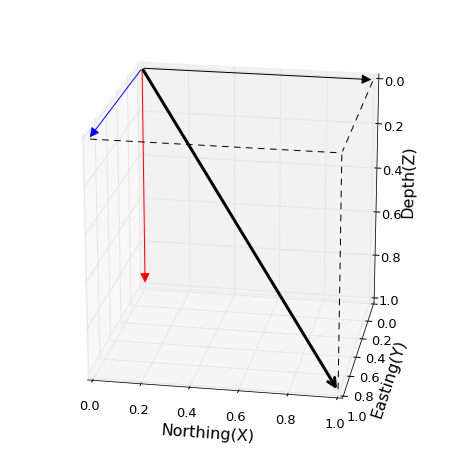

In [463]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
arrowfun = lambda a, b: Arrow3D([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color="k")
print x1,y1,z1
print x2,y2,z2
y = Arrow3D([0,1],[0,0],[0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
y0 = Arrow3D([0,1],[1,1],[0,0], mutation_scale=20, lw=1, arrowstyle="-", color="k", linestyle="dashed")
x = Arrow3D([0,0],[0,1],[0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="b")
x0 = Arrow3D([1,1],[0,1],[0,0], mutation_scale=20, lw=1, arrowstyle="-", color="k", linestyle="dashed")
z = Arrow3D([0,0],[0,0],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
z0 = Arrow3D([1,1],[1,1],[0,1], mutation_scale=20, lw=1, arrowstyle="-", color="k", linestyle="dashed")

vec = Arrow3D([0,1],[0,1],[0,1], mutation_scale=20, lw=3, arrowstyle="->", color="k")
vec_rand = arrowfun(np.array([x1, y1, z1]), np.array([x2, y2, z2]))
ax.add_artist(x)
ax.add_artist(y)
ax.add_artist(z)
ax.add_artist(x0)
ax.add_artist(y0)
ax.add_artist(z0)

ax.add_artist(vec)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel("Northing(X)", color='k', fontsize = 16)
ax.set_ylabel("Easting(Y)", color='k', fontsize = 16)
ax.set_zlabel("Depth(Z)", color='k', fontsize = 16)
ax.invert_zaxis()
ax.invert_yaxis()
ax.view_init(20,-80)

In [464]:
def plotObj3D(p,elev,azim):
    
    depth = p.props['depth']
    x1, x2 = p.x1, p.x2
    y1, y2 = p.y1, p.y2
    z1, z2 = p.z1, p.z2
    pinc, pdec = p.props['pinc'], p.props['pdec']
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams.update({'font.size': 13})
    
    ax.set_xlim3d(surveyArea[:2])
    ax.set_ylim3d(surveyArea[2:])
    ax.set_zlim3d(0., 10.)

    xpatch = [x1,x1,x2,x2]
    ypatch = [y1,y2,y2,y1]
    zpatch = [z1,z1,z1,z1]
    
    dumvec = fatiandoUtils.ang2vec(1.,pinc,pdec)
    
#     xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],dumvec,np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    xyz = np.vstack([xpatch,ypatch,zpatch]).T

    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))
    zpatch = [z2,z2,z2,z2]
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],dumvec,np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    xyz = (P.dot(xyz.T)).T    
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))
    
    xpatch = [x1,x1,x1,x1]
    ypatch = [y1,y2,y2,y1]
    zpatch = [z1,z1,z2,z2]                                  
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],dumvec,np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    xyz = (P.dot(xyz.T)).T    
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))    
    xpatch = [x2,x2,x2,x2]                                 
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],dumvec,np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    xyz = (P.dot(xyz.T)).T
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])])) 
    
    xpatch = [x1,x2,x2,x1]
    ypatch = [y1,y1,y1,y1]
    zpatch = [z1,z1,z2,z2]                                  
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],dumvec,np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    xyz = (P.dot(xyz.T)).T    
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])]))   
    ypatch = [y2,y2,y2,y2]                                 
    xyz = simpegCoordUtils.rotatePointsFromNormals(np.vstack([xpatch,ypatch,zpatch]).T, np.r_[1., 0., 0.],dumvec,np.r_[(x1+x2)/2., (y1+y2)/2., (z1+z2)/2.])
    xyz = (P.dot(xyz.T)).T
    ax.add_collection3d(Poly3DCollection([zip(xyz[:,0], xyz[:,1], xyz[:,2])])) 
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Depth (m)')
    ax.invert_zaxis()
    ax.invert_yaxis()
    ax.view_init(elev,azim) 

# ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b')

In [465]:
dx = 10.
dy = 1.
dz = 1.
depth = 3. 

In [466]:
# def prsm(dx0, dy0, dz0, depth0, pinc, pdec):
#     out = abs(Pinv.dot(np.r_[dx0, dy0, dz0]))
#     dx, dy, dz = out[0], out[1], out[2]
#     print dx0, dy0, dz0
#     print dx, dy, dz
#     depth = -depth0
    
#     return definePrism(dx, dy, -dz, depth, susc = 1., Einc=90., Edec=0., Bigrf=1e-6, pinc=pinc, pdec=pdec)

10.0 1.0 1.0
1.0 10.0 1.0


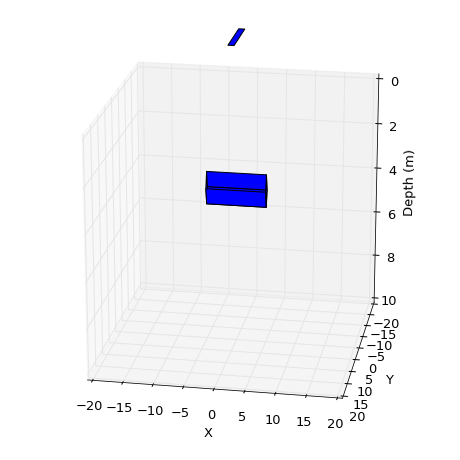

In [467]:
# prsm = lambda pinc,pdec: definePrism(dx, dy, dz, depth, susc = 1., Einc=90., Edec=0., Bigrf=1e-6, pinc=pinc, pdec=pdec)
interact(lambda dx, dy, dz, depth, pinc, pdec: plotObj3D(prsm(dx, dy, dz, depth, pinc,pdec),20,-80),\
         dx=FloatText(value=dx),dy=FloatText(value=dy),dz=FloatText(value=dz),depth=FloatText(value=depth),\
         pinc=(-90.,90.,1.), pdec=(-180.,180.,1.))

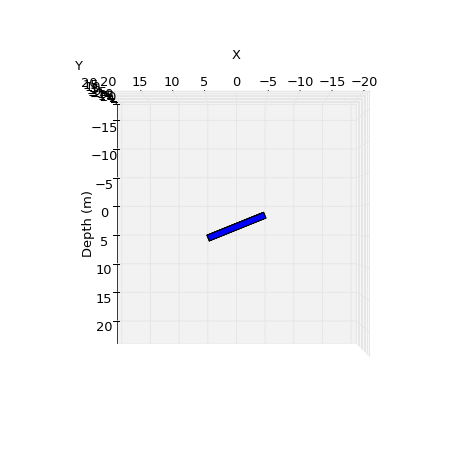

In [187]:
dx, dy, dz = 10, 10, 1
# prsm = lambda pinc,pdec: definePrism(dx, dy, dz, depth, susc = 1., Einc=90., Edec=0., Bigrf=1e-6, pinc=pinc, pdec=pdec)
interact(lambda dx, dy, dz, depth, pinc, pdec: plotObj3D(prsm(dx, dy, dz, depth, pinc,pdec),0,90),\
         dx=FloatText(value=dx),dy=FloatText(value=dy),dz=FloatText(value=dz),depth=FloatText(value=depth),\
         pinc=(0,90,1.), pdec=(-180.,180.,1.))

In [33]:
def plotMag(p, comp='tf'):
    fig,ax = plt.subplots(1,2, figsize = (9, 4))
    plt.rcParams.update({'font.size': 13})

    fieldi = getField(p,comp,'induced')
    fieldr = getField(p,comp,'remnant')
    fieldt = fieldi + fieldr
    
    fig.canvas.draw()
    im = ax[0].pcolor(xp.reshape(shape),yp.reshape(shape),fieldi.reshape(shape))
    ax[0].axis('equal')
    # ax[0].axis('tight')

    ax[0].set_xlabel('Easting (m)')
    ax[0].set_ylabel('Northing (m)')
    fig.colorbar(im,ax=ax[0],label=comp+' (nT)')

    plotDataPoints = False
    if plotDataPoints:
        ax[0].plot(xp,yp,'.',color='k')

    # plot a line of data
    xline = 0.
    xvec = xp.reshape(shape)[:,0]
    ind = np.min(np.nonzero(abs(xvec - xline) == abs(xvec - xline).min()))
    ax[0].plot(xp.reshape(shape)[ind,:],yp.reshape(shape)[ind,:],'k',linewidth=1.4)

    ax[1].plot(yp.reshape(shape)[ind,:],fieldi.reshape(shape)[ind,:],'o-',markersize=4)
    ax[1].plot(yp.reshape(shape)[ind,:],fieldr.reshape(shape)[ind,:],'o-',markersize=4)
    ax[1].plot(yp.reshape(shape)[ind,:],fieldt.reshape(shape)[ind,:],'o-',markersize=4)

    ax[1].grid(which='both')
    ax[1].set_ylabel(comp +' (nT)')
    ax[1].set_xlabel('Northing (m)')
    ax[1].legend(['induced','remanent','total'],loc='best')

    plt.tight_layout()
    
#     return fig,ax

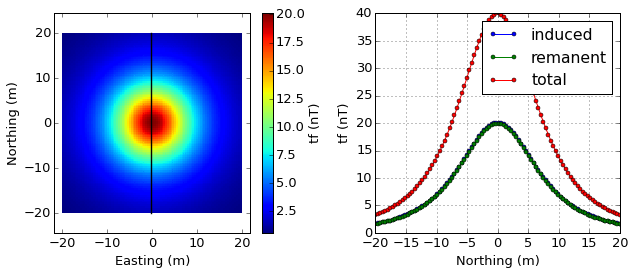

In [34]:
plotMagprsm = lambda dx, depth, susc, Einc, Edec, Bigrf, Q, rinc, rdec, comp: plotMag(definePrism(dx=dx, dy=dx, dz=100., depth = depth, susc = susc, Einc= Einc, Edec= Edec, Bigrf=Bigrf, Q=Q,rinc=rinc,rdec=rdec),comp=comp)
interact(plotMagprsm, dx = (1e-2,1e0,1e-2), depth = (0.,20.,0.1), susc = (0.,200.,1.), Einc = (0.,180.,1.), Edec = (-180.,180.,1.), Bigrf=FloatText(value=1000.), Q=(0.,2.,0.01),rinc=(0.,180.,1.),rdec=(-180.,180.,1.),comp=ToggleButtons(options=['tf','bx','by','bz'],align='horizontal') )

In [29]:
a = RadioButtons(options=['x','y','z'])

In [30]:
a.